<h2>Preparation for the data</h2><br>

In [1]:
# essentials
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt

# guess gender
import gender_guesser.detector as gender

# machine learning
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf 
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import roc_auc_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import make_scorer                
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# setting the print option to see all the columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into python
file = "./GOT_character_predictions.xlsx"
got = pd.read_excel(io     = file,
                    header = 0)

# checking the data
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [3]:
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [4]:
# creating missing value flags
got['m_title'] = got['title'].isnull().astype(int)
got['m_culture'] = got['culture'].isnull().astype(int)
got['m_dateOfBirth'] = got['dateOfBirth'].isnull().astype(int)
got['m_mother'] = got['mother'].isnull().astype(int)
got['m_father'] = got['father'].isnull().astype(int)
got['m_heir'] = got['heir'].isnull().astype(int)
got['m_house'] = got['house'].isnull().astype(int)
got['m_spouse'] = got['spouse'].isnull().astype(int)
got['m_isAliveMother'] = got['isAliveMother'].isnull().astype(int)
got['m_isAliveFather'] = got['isAliveFather'].isnull().astype(int)
got['m_isAliveSpouse'] = got['isAliveSpouse'].isnull().astype(int)
got['age'] = got['age'].isnull().astype(int)

In [5]:
# to split the first name and the last name

placeholder_lst = []

# split the name by ' '
for index, col in got.iterrows():
    split_name = got.loc[index, 'name'].split(sep = ' ')
    placeholder_lst.append(split_name)
    
name_df = pd.DataFrame(placeholder_lst)

# insert the 'first_name' column to got
got['first_name'] = name_df[0]
"""
By looking through the data, I found that characters with Roman numerals in
their names were not counted in House Targaryen.
Therefore, I add the column for them and save for later to join the major
house.

"""
got['last_name_2'] = name_df[2]

hos = {'Targaryen':'House Targaryen'}
got['last_name_2'] = got['last_name_2'].map(hos)

# checking for the new columns 
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveSpouse,first_name,last_name_2
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,1,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,1,Viserys,House Targaryen
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,0,Walder,NaN
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,1,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,Addison,NaN
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,0,Aemma,NaN
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,0,Sylva,NaN


In [6]:
# setting a dictionary for the nine major houses
maj = {'House Stark': 'major_house', 
       'House Lannister': 'major_house', 
       'House Baratheon': 'major_house', 
       'House Arryn': 'major_house',
       'House Tully': 'major_house', 
       'House Greyjoy': 'major_house', 
       'House Tyrell': 'major_house', 
       'House Martell': 'major_house',
       'House Targaryen': 'major_house'}

# adding a new column for major house and minor house as 'maj_house'
got['maj_house'] = got['house'].map(maj)
        
got['maj_house'].fillna(value = 'minor_house', inplace = True)

# checking for the new column
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveSpouse,first_name,last_name_2,maj_house
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,1,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,1,Viserys,House Targaryen,minor_house
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,0,Walder,NaN,minor_house
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,1,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,Addison,NaN,minor_house
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,0,Aemma,NaN,major_house
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,0,Sylva,NaN,minor_house


<h2> Guessing gender based on character first name</h2><br>
<strong>After running the models, I find out that gender was not the significant variable and not affecting the AUC Score.</strong><br>
<strong>So I changed it to markdown cell.</strong><br>
    

placeholder_lst = []

for name in got['first_name']:
    guess = gender.Detector().get_gender(name)
    placeholder_lst.append(guess)

got['gender_guess'] = pd.Series(placeholder_lst)

gen = {'unknown' : 'is_unknown',
       'male' : 'is_male',
       'female' : 'is_female',
       'mostly_male' : 'is_male',
       'mostly_female' : 'is_female',
       'andy' : 'is_male'}

got['gender'] = got['gender_guess'].map(gen)

In [7]:
# setting the popularity into 4 classes
for num in got['popularity']:
    if num >= 0.25:
        got['popularity'].replace(to_replace = num, 
                                   value = "popul_class1", 
                                   inplace = True)
    elif num >= 0.08:
        got['popularity'].replace(to_replace = num, 
                                   value = "popul_class2", 
                                   inplace = True)
    elif num >= 0.03:
        got['popularity'].replace(to_replace = num, 
                                   value = "popul_class3", 
                                   inplace = True)
    else:
        got['popularity'].replace(to_replace = num, 
                                   value = "popul_class4", 
                                   inplace = True)

In [8]:
# droping columns
# age is same as the dateOfBirth, so I droped 'age'
got_copy = got.drop(['name', 'title', 'culture', 'mother', 'father', 'spouse',
                     'first_name', 'heir', 'house', 'S.No',
                     'age', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
                     'isAliveSpouse', 'dateOfBirth'], 
                     axis = 1) 

# getting the dummies
got_dummy = pd.get_dummies(data = got_copy,
                           columns = ['popularity', 'last_name_2', 'maj_house'])

# making the rest of House Targaryen join major house
got_dummy['is_major_house'] = got_dummy['last_name_2_House Targaryen'] + got_dummy['maj_house_major_house']

got_dummy = got_dummy.drop(['last_name_2_House Targaryen', 'maj_house_major_house',
                            'maj_house_minor_house'],
                            axis = 1)
got_dummy.head(n=5)

,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isMarried,isNoble,numDeadRelations,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveSpouse,popularity_popul_class1,popularity_popul_class2,popularity_popul_class3,popularity_popul_class4,is_major_house
0,0,0,0,0,0,0,0,11,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1
4,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0


In [9]:
# spliting the response variable
got_data = got_dummy.drop('isAlive', axis = 1)
got_target = got_dummy.loc[ : , 'isAlive' ]

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)

got_train = pd.concat([x_train, y_train], axis = 1)

# to check if variables are significant
logit_f1 = smf.logit(formula = """ isAlive  ~  
 book1_A_Game_Of_Thrones + 
 book4_A_Feast_For_Crows +
 m_dateOfBirth + 
 numDeadRelations + 
 popularity_popul_class1 + 
 popularity_popul_class2 + 
 popularity_popul_class3""",
data = got_train)


# fitting the model object
results_f1 = logit_f1.fit()


# checking the results SUMMARY
results_f1.summary2()

Optimization terminated successfully.
         Current function value: 0.475914
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.160     
Dependent Variable:   isAlive            AIC:                1682.6522 
Date:                 2021-12-05 19:33   BIC:                1726.3957 
No. Observations:     1751               Log-Likelihood:     -833.33   
Df Model:             7                  LL-Null:            -992.53   
Df Residuals:         1743               LLR p-value:        7.0315e-65
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.6807   0.1793  3.7967 0.0001  0.3293  1.0322
book1_A_Game_Of_Thrones -0.4474   0.1504 -2.9751 0.0029 -0.7421 -0.1526
book4_A_Feast_For_Crows  1.8146   0.1401 12.9521 0.0000  1.5400  2.0892
m_dateOfBirth            0.4945   0.1551  3.1887 0.0014  0.1906  0.7985
numDeadRelations        -0.1056   0.0456 -2.3161 0.0206 -0.1949 -0.0162
popularity_popul_class1 -1.6967   0.2605 -6.5131 0.0000 -2.2072 -1.1861
popularity_popul_class2 -1.2608   0.1865 -6.7618 0.0000 -1.6263 -0.8954
popularity_popul_class3 -1.2369   0.1584 -7.8082 0.0000 -1.5474 -0.9264
=======================================================================

"""

In [10]:
candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows','isNoble', 
'numDeadRelations', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother',
'm_heir', 'm_house', 'm_spouse' ,'m_isAliveMother', 'm_isAliveSpouse',
'popularity_popul_class1', 'popularity_popul_class2', 'popularity_popul_class3',
'is_major_house'],
 

 # significant variables only
 'logit_sig'    : ['book1_A_Game_Of_Thrones' , 'book4_A_Feast_For_Crows', 
                   'm_dateOfBirth', 
                   'popularity_popul_class4',
                   'popularity_popul_class3'],

}

# Logistic Regression

In [11]:
# train/test split with the logit_sig model
got_data   =  got_dummy.loc[ : , candidate_dict['logit_sig']]
got_target =  got_dummy.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)       # to give a range, loop over to get the best model
warm_start_range = [True, False]                  
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   
                                 param_distributions = param_grid, 
                                 cv                  = 3,          
                                 n_iter              = 250,        
                                 random_state        = 219,        
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.6423


In [12]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 1.4000000000000001,
                              warm_start   = False,
                              solver       = 'sag',
                              max_iter     = 1000,
                              random_state = 219)



# FITTING the model
lr_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7778
Testing  ACCURACY: 0.8564
AUC Score        : 0.7659


In [13]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 7
True Positives : 138



# Classification Trees

In [14]:
# developing a tuned classification tree model using RandomizedSearchCV
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 92, 'max_depth': 2, 'criterion': 'entropy'}
Tuned Training AUC: 0.657


In [15]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 92,
                                    max_depth        = 2,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7784
Testing  ACCURACY: 0.8564
AUC Score        : 0.7659


In [16]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 7
True Positives : 138



# Random Forest

In [17]:
got_data   =  got_dummy.loc[:, candidate_dict['logit_full'] ]
got_target =  got_dummy.loc[:, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.787
Testing  ACCURACY: 0.7949
AUC Score        : 0.6


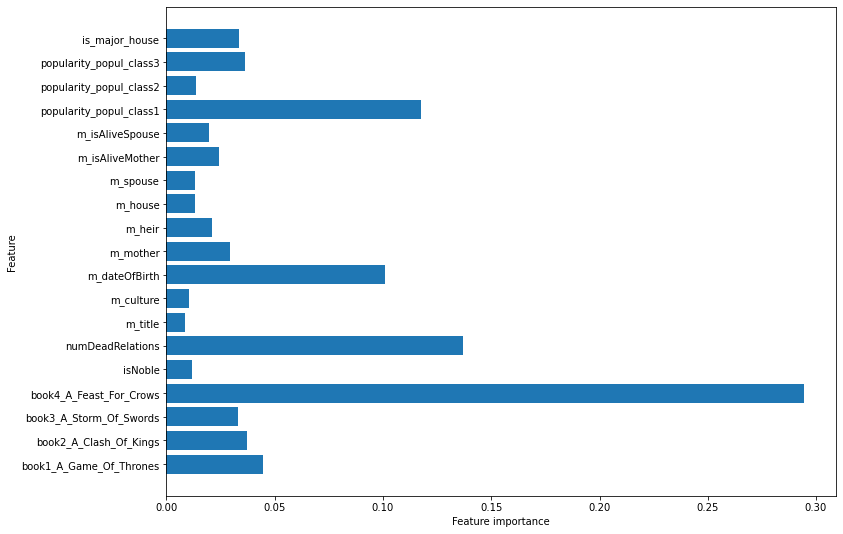

In [18]:
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    # plotting feature importances
plot_feature_importances(model = rf_default_fit,
                         train = x_train,
                         export = False)

In [19]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000, 
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/xinyuanzhou/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 850, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.652


In [20]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

/Users/xinyuanzhou/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Forest Tuned Training ACCURACY: 0.8778
Forest Tuned Testing  ACCURACY: 0.8974
Forest Tuned AUC Score        : 0.859


In [21]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 9
True Positives : 136



# Gradient Boosted Machines

In [23]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 1.1}
Tuned Training AUC: 0.6713


In [24]:
# INSTANTIATING with best_estimator
gbm_tuned = full_gbm_cv.best_estimator_


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
gbm_tuned_auc = roc_auc_score(y_true  = y_test,
                            y_score = forest_tuned_pred).round(4) # auc

Training ACCURACY: 0.8778
Testing  ACCURACY: 0.8974
AUC Score        : 0.859


In [25]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 9
True Positives : 136



# KNN

In [35]:
got_data   =  got_dummy.loc[:, candidate_dict['logit_sig'] ]
got_target =  got_dummy.loc[:, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

# train/test split with the logit_sig model
got_data   =  got_dummy.loc[ : , candidate_dict['logit_sig']]
got_target =  got_dummy.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)

# declaring a hyperparameter space    
weights_range          = ['uniform', 'distance']                  
algorithm_range        = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size_range        = np.arange(1, 50, 1)



# creating a hyperparameter grid
param_grid = {'weights'     : weights_range,
              'algorithm'   : algorithm_range,
              'leaf_size'   : leaf_size_range}


# INSTANTIATING the model object without hyperparameters
# changed n_neighbors to 42 base on the optimal number of neighbors
kn_tuned = KNeighborsClassifier(n_neighbors = 42) 


# GridSearchCV object
kn_tuned_cv = RandomizedSearchCV(estimator           = kn_tuned,   
                                 param_distributions = param_grid, 
                                 cv                  = 3,          
                                 n_iter              = 250,        
                                 random_state        = 219,        
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
kn_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", kn_tuned_cv.best_params_)
print("Tuned CV AUC      :", kn_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'weights': 'distance', 'leaf_size': 6, 'algorithm': 'ball_tree'}
Tuned CV AUC      : 0.6353


In [36]:
# INSTANTIATING with best_estimator
kn_tuned = kn_tuned_cv.best_estimator_


# FITTING to the FULL DATASET (due to cross-validation)
kn_tuned_fit = kn_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
kn_tuned_pred = kn_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', kn_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', kn_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = kn_tuned_pred).round(4))


kn_tuned_train_score = kn_tuned.score(x_train, y_train).round(4) # accuracy
kn_tuned_test_score  = kn_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
kn_tuned_auc = roc_auc_score(y_true  = y_test,
                            y_score = kn_tuned_pred).round(4) # auc

Training ACCURACY: 0.7881
Testing  ACCURACY: 0.8667
AUC Score        : 0.7531


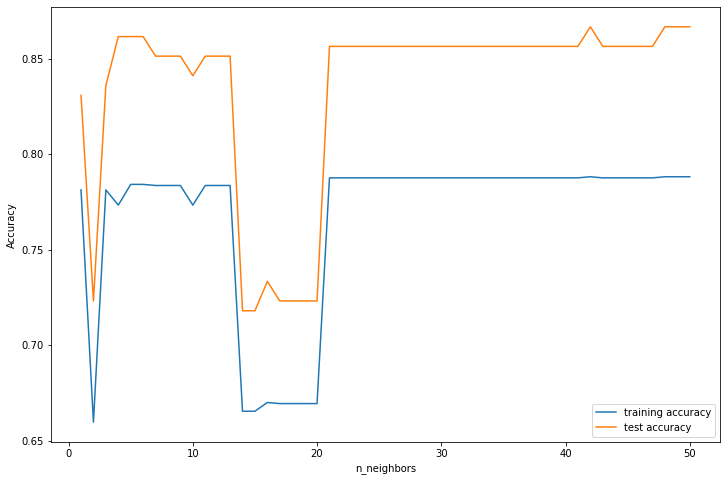

In [37]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [38]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 42


In [39]:
# unpacking the confusion matrix
kn_tuned_tn, \
kn_tuned_fp, \
kn_tuned_fn, \
kn_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {kn_tuned_tn}
False Positives: {kn_tuned_fp}
False Negatives: {kn_tuned_fn}
True Positives : {kn_tuned_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 9
True Positives : 136



# Model Performance

In [42]:
model_performance = {
    
    'Model Name'    : ['Logistic', 'Classification Trees', '*Random Forest*',
                       'GBM', 'KNN'],
           
    'AUC Score' : [lr_tuned_auc, tree_tuned_auc, forest_tuned_auc,
                   gbm_tuned_auc, kn_tuned_auc],
    
    'Training Accuracy' : [lr_tuned_train_score, tree_tuned_train_score,
                           forest_tuned_train_score, gbm_tuned_train_score,
                           kn_tuned_train_score],
           
    'Testing Accuracy'  : [lr_tuned_test_score, tree_tuned_test_score,
                           forest_tuned_test_score, gbm_tuned_test_score,
                           kn_tuned_test_score],

    'TN, FP, FN, TP'    : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp),
                           (kn_tuned_tn, kn_tuned_fp, kn_tuned_fn, kn_tuned_tp)]}

model_performance = pd.DataFrame(model_performance)

In [43]:
print(model_performance,'\n * Final model*')

             Model Name  AUC Score  Training Accuracy  Testing Accuracy    TN, FP, FN, TP
0              Logistic     0.7659             0.7778            0.8564  (29, 21, 7, 138)
1  Classification Trees     0.7659             0.7784            0.8564  (29, 21, 7, 138)
2       *Random Forest*     0.8590             0.8778            0.8974  (39, 11, 9, 136)
3                   GBM     0.8590             0.8778            0.8974  (39, 11, 9, 136)
4                   KNN     0.7531             0.7881            0.8667  (39, 11, 9, 136) 
 * Final model*
